In [1]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats
import csv
# this line plots graphs in line
%matplotlib inline

In [8]:
import pickle #so we can import the .pkl file 
infile = open("office_rent.pkl", 'rb')
office_rent_data = pickle.load(infile) 
infile.close()
office_rent_data

[[1, 500, 4, 8, 'C', 320],
 [2, 550, 7, 50, 'A', 380],
 [3, 620, 9, 7, 'A', 400],
 [4, 630, 5, 24, 'B', 390],
 [5, 665, 8, 100, 'C', 385],
 [6, 700, 4, 8, 'B', 410],
 [7, 770, 10, 7, 'B', 480],
 [8, 880, 12, 50, 'A', 600],
 [9, 920, 14, 8, 'C', 570],
 [10, 1000, 9, 24, 'B', 620]]

In [9]:
char2int = {'A':1, 'B':2, 'C':3} #defing the mapping from letters to int
for item in office_rent_data:
    item[4] = char2int[item[4]]#changing the letters to ints 

In [10]:
rent_data = np.array(office_rent_data, dtype = float)
rent_data

array([[   1.,  500.,    4.,    8.,    3.,  320.],
       [   2.,  550.,    7.,   50.,    1.,  380.],
       [   3.,  620.,    9.,    7.,    1.,  400.],
       [   4.,  630.,    5.,   24.,    2.,  390.],
       [   5.,  665.,    8.,  100.,    3.,  385.],
       [   6.,  700.,    4.,    8.,    2.,  410.],
       [   7.,  770.,   10.,    7.,    2.,  480.],
       [   8.,  880.,   12.,   50.,    1.,  600.],
       [   9.,  920.,   14.,    8.,    3.,  570.],
       [  10., 1000.,    9.,   24.,    2.,  620.]])

[7.]


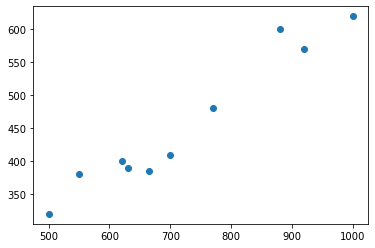

In [28]:
#plot scatter 
#note we specify row as colon, i.e all and specify the coloum which is what we need 
plt.plot(rent_data[:,1], rent_data[:,5], 'o') #called numpy slicing 
#we can check different values to see their scatter

print(rent_data[2:3,3]) # 3rd col first 3rd place (2:3 means from 2 to 3, the other 3 is the col ) 
#plotting area against rental price 

In [33]:
X = np.copy(rent_data[:,1]).reshape(10,1) #if we don't copy x will be pointer
#can all use ravel (imp look up what it does)
X.shape #we avoid shapes of (no, ) since this is undefined, so we reshape
X #X is the input 

array([[ 500.],
       [ 550.],
       [ 620.],
       [ 630.],
       [ 665.],
       [ 700.],
       [ 770.],
       [ 880.],
       [ 920.],
       [1000.]])

In [36]:
t = np.copy(rent_data[:,5]).reshape(10,1)
t.shape #target labels

(10, 1)

In [47]:
X,t
N = len(X) #can also be defined as t.shape[0]
numerator = N*np.sum(X*t) - np.sum(X)*np.sum(t)
denominator = N*np.sum(X**2) - (np.sum(X)**2)
w_1 = numerator/denominator
print(w_1)

w_0 = 1/N*(t.sum())-(w_1/N)*X.sum()
print(w_0)

0.6206400831965416
6.466899807302127


## Exercise in gradient descent: (answers given)
### to find the input values that minimize  
### (i) a univariate quadratic, 
### and (ii) a bi-variate quadratic

### Exercise 1:

### 1. Plot the below univariate quadratic function ($0.0 < x < 4.0$)
##        $$f(x) = x^2 - 4x + 4.5$$
### 2. Compute the derivative wrt $x$ 
### 3. Implement the gradient descent algorithm to find the value of $x$ that minimizes $f(x)$ 
### 4. Superimpose the gradient descent iterations on the graph in (1) 

z =  1.9999999999999996


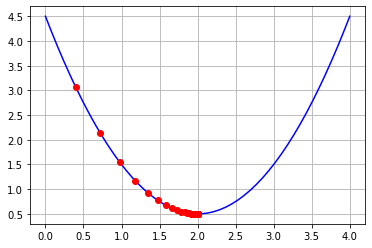

In [58]:
x = np.linspace(0.,4.,50)
y = x**2.0 - 4*x + 4.5 #the equation (in the gradient descent formula this is J) 
#z = np.random.rand() #starting position 
z=0.001
alpha = .1 #the learing rate 
N=200 #no of iterations 
xx = np.zeros(shape=(N),dtype=float) #to hold x & y values for decent 
yy = np.zeros_like(xx)
for itr in range(N):
    z = z - alpha * (2*z -4) #derivative (comupted analyticaly) (z is random x)
    xx[itr] = z
    yy[itr] = z**2.0 - 4*z + 4.5
    #print "z = ",z
plt.plot(x,y,'b',xx,yy,'ro') #plotting the curve and points 
plt.grid() #showing the grid
print("z = ",z)

### Exercise 2:

### 1. Plot the below bi-variate quadratic function on a 3D wireframe graph.
##        $$f(x,y) = x^2 + y^2 + 1$$
### for $-20.0 < x < 20.0$ and $-20.0<y<20.0$
### 2. Compute the partial derivatives wrt $x$ and $y$
### 3. Implement the gradient descent algorithm to find the value of $(x,y)$ that minimizes $f(x,y)$ 
### 4. Superimpose the gradient descent iterations on the graph in (1) 

In [59]:
def f(x,y,a,b,c):
    return a*x**2.0 + b*y**2.0 + c

N=15
x = np.linspace(-20.,20.,N)
y = np.linspace(-20,20.,N)

X = np.repeat(x,N).reshape(N,N)
#print X
Y = np.tile(y,N).reshape(N,N)
#print Y

In [60]:
Z=f(X,Y,1.,1.,1.)
Z.shape
#print Z

(15, 15)

In [61]:
x_, y_ = np.random.rand(2)*20 #generating random nos 
print(x_, y_)
x_, y_ = [10,20] 
alpha = .1 #learning rate
N=100 #iterations 
xx = np.zeros(shape=(N),dtype=float) #to hold results 
yy = np.zeros_like(xx)
zz = np.zeros_like(xx)
for itr in range(N):
    xx[itr] = x_
    yy[itr] = y_
    zz[itr] = f(x_,y_,1.,1.,1.)

    x_ = x_ - alpha * (2*x_) #partial derv w.r.t x
    y_ = y_ - alpha * (2*y_) #partial derv w.r.t y
print("x, y, z = ",x_, y_, zz[-1])

18.24656014833785 5.6152021915413375
x, y, z =  2.0370359763344878e-09 4.0740719526689756e-09 1.0


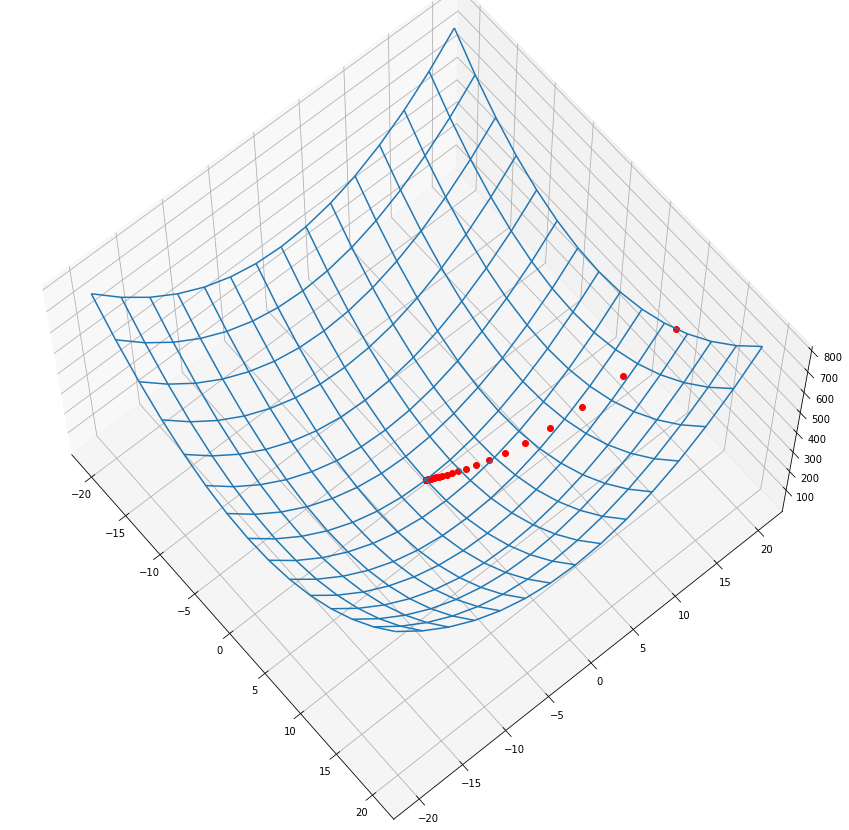

In [62]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Grab some test data.
#X, Y, Z = Axes3D.get_test_data(0.05)

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1)
ax.plot3D(xx,yy,zz,'ro')
ax.view_init(90, 10) # elevation, azimuth
ax.view_init(65, -40) # elevation, azimuth
#ax.view_init(0, -40) # elevation, azimuth
# ax.contour3D(X, Y, Z, 50, cmap='binary')
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z');
# plt.show()
